### Cleaning

- 1 - Cleaning the dataset.
  - read csv file.
  - create the feature - target.
  - Save feather format. 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import feather
import time

In [95]:
# Get start time 
start_time = time.time()

In [96]:
df_covid = pd.read_csv('../dataset/datacovid.csv')
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [108]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU',
       'ALIVE_OR_DIED'],
      dtype='object')

In [97]:
# creating a new cloumn based on the column 'DATE_DIED'
# DATE is e.g. 15/02/2020 - True(Died), otherwise is False(Alive).
df_covid['ALIVE_OR_DIED'] = np.where(df_covid['DATE_DIED']!= '9999-99-99', 'Died', 'Alive')
df_covid['ALIVE_OR_DIED'].head()

0    Died
1    Died
2    Died
3    Died
4    Died
Name: ALIVE_OR_DIED, dtype: object

In [98]:
df_covid = df_covid.drop(columns='DATE_DIED') # drop column - DATE_DIED
df_covid.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
ALIVE_OR_DIED           object
dtype: object

In [99]:
# change type for column of object to category
df_covid['ALIVE_OR_DIED'] = df_covid['ALIVE_OR_DIED'].astype('category')
df_covid.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                        int64
PATIENT_TYPE               int64
INTUBED                    int64
PNEUMONIA                  int64
AGE                        int64
PREGNANT                   int64
DIABETES                   int64
COPD                       int64
ASTHMA                     int64
INMSUPR                    int64
HIPERTENSION               int64
OTHER_DISEASE              int64
CARDIOVASCULAR             int64
OBESITY                    int64
RENAL_CHRONIC              int64
TOBACCO                    int64
CLASIFFICATION_FINAL       int64
ICU                        int64
ALIVE_OR_DIED           category
dtype: object

In [100]:
df_covid['ALIVE_OR_DIED'].value_counts(normalize=True).map('{:.2%}'.format)

Alive    92.66%
Died      7.34%
Name: ALIVE_OR_DIED, dtype: object

In [101]:
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
import seaborn as sns
plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution - Age')

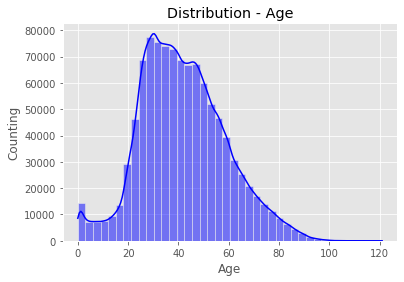

In [107]:
sns.histplot(data=df_covid, x="AGE", bins=40, kde=True, color="blue")
plt.xlabel('Age')
plt.ylabel('Counting')
plt.title('Distribution - Age')

In [103]:
print(f"Shape dataset Full after clean:.........observations/rows: {df_covid.shape[0]} and columns: {df_covid.shape[1]}")


Shape dataset Full after clean:.........observations/rows: 1048575 and columns: 21


In [104]:
print("saving the file format feather...")
# this is important to do before save in feather format.
concat_dfs = df_covid.reset_index(drop=True) 
concat_dfs.to_feather('../dataset/feather/cleaned.ftr')

saving the file format feather...


In [105]:
# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 0.0567 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
